In [1]:
# importação de todos os pacotes e colocar a impressão em linha
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Carregar dados e atribuir colunas

results = pd.read_csv('archive/results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position', 'position_text', 'position_order',
                                                       'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id'], header = None)
races = pd.read_csv('archive/races.csv', names = ['race_id', 'year', 'round', 'circuit_id', 'name', 'date', 'time', 'url'], header = None)
drivers = pd.read_csv('archive/drivers.csv', names = ['driver_id', 'driver_ref', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'], header = None)
constructors = pd.read_csv('archive/constructors.csv', names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url'], header = None)

In [3]:
# Unir os datasets

df = pd.merge(results, races[['race_id', 'year', 'name', 'round']], on = 'race_id', how = 'left')
df = pd.merge(df, drivers[['driver_id', 'driver_ref', 'nationality']], on = 'driver_id', how = 'left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality']], on = 'constructor_id', how = 'left')

In [4]:
# Remover as colunas

df.drop(['number', 'position', 'position_text', 'laps', 'fastest_lap', 'status_id', 'result_id', 'race_id', 'driver_id', 'constructor_id'], axis = 1, inplace = True)
df = df.drop(0)

In [5]:
#Renomear as colunas

df.rename(columns={'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality', 'name_y':'constructor_name', 'nationality_y':'constructor_nationality', 'driver_ref':'driver'}, inplace=True)

In [6]:
# Reorganizar colunas

df = df[['year','gp_name','round','driver','constructor_name','grid','position_order','points','time','milliseconds','fastest_lap_rank','fastest_lap_time','fastest_lap_speed','driver_nationality','constructor_nationality']]

In [7]:
# Removendo a temporada 2022 por estar incompleta

df = df[df['year']!='2022']

In [8]:
# Ordenar valores

df = df.sort_values(by=['year','round','position_order'], ascending=[False, True, True])

In [9]:
# Substituindo valores \N nas colunas de tempo

df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastest_lap_time.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)

In [10]:
# Alterando os tipos de dados

df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)
df.grid = df.grid.astype(int)
df.position_order = df.position_order.astype(int)

In [11]:
# Resetando index

df.reset_index(drop=True, inplace=True)

In [12]:
# shape

print(df.shape)

(25400, 15)


In [13]:
# info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  object 
 1   gp_name                  25400 non-null  object 
 2   round                    25400 non-null  object 
 3   driver                   25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int32  
 6   position_order           25400 non-null  int32  
 7   points                   25400 non-null  object 
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastest_lap_time         6953 non-null   object 
 12  fastest_lap_speed        6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [14]:
# head()

df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1,+86.713,5610610.0,9.0,1:34.865,205.378,Canadian,British
2,2021,Bahrain Grand Prix,1,raikkonen,Alfa Romeo,14,11,0,+88.864,5612761.0,14.0,1:35.192,204.672,Finnish,Swiss
3,2021,Bahrain Grand Prix,1,giovinazzi,Alfa Romeo,12,12,0,NaN,NaN,13.0,1:35.122,204.823,Italian,Swiss
4,2021,Bahrain Grand Prix,1,ocon,Alpine F1 Team,16,13,0,NaN,NaN,15.0,1:35.250,204.548,French,French
5,2021,Bahrain Grand Prix,1,russell,Williams,15,14,0,NaN,NaN,12.0,1:35.036,205.008,British,British
6,2021,Bahrain Grand Prix,1,vettel,Aston Martin,20,15,0,NaN,NaN,16.0,1:35.566,203.871,German,British
7,2021,Bahrain Grand Prix,1,mick_schumacher,Haas F1 Team,18,16,0,NaN,NaN,18.0,1:36.134,202.667,German,American
8,2021,Bahrain Grand Prix,1,gasly,AlphaTauri,5,17,0,NaN,NaN,5.0,1:34.090,207.069,French,Italian
9,2021,Bahrain Grand Prix,1,latifi,Williams,17,18,0,NaN,NaN,19.0,1:36.602,201.685,Canadian,British


In [15]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

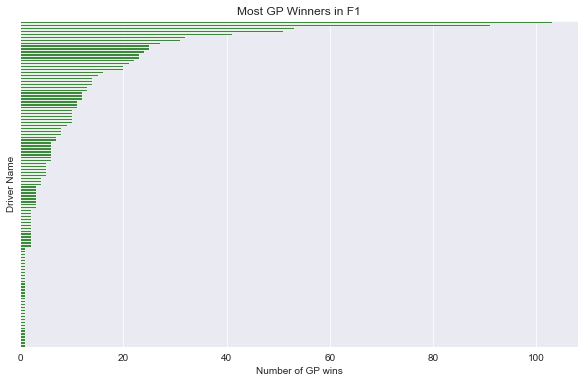

In [16]:
# Ganhadores dos GPs

driver_winner = df.loc[df['position_order']==1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Impressão de barra

sb.barplot(data=driver_winner, y='driver', x='position_order',color='green',alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [17]:
# Criar novo dataframe dos top 10

top10Drivers = driver_winner.head(10)
print(top10Drivers)

               driver  position_order
0            hamilton             103
1  michael_schumacher              91
2              vettel              53
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Text(0.5, 0, 'Number of GP wins')

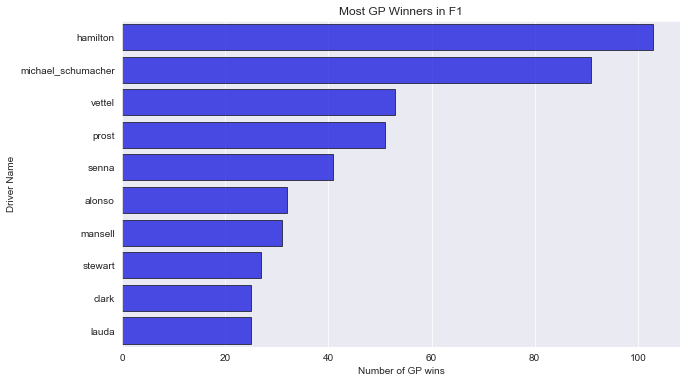

In [18]:
# Imprimindo os top 10

sb.barplot(data = top10Drivers, y='driver', x='position_order',color='blue',alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

([], [])

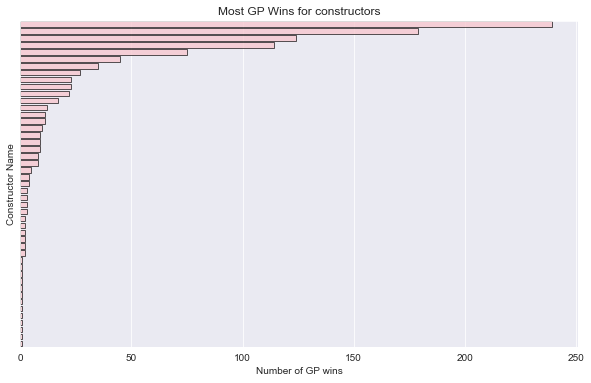

In [19]:
# Construtores ganhadores dos GPs

constructor_winner = df.loc[df['position_order']==1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Impressão de barras

sb.barplot(data=constructor_winner, y='constructor_name', x='position_order',color='pink',alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('Most GP Wins for constructors')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [20]:
# Criar novo dataframe dos top 10

top10Constructor = constructor_winner.head(10)
print(top10Constructor)

  constructor_name  position_order
0          Ferrari             239
1          McLaren             179
2         Mercedes             124
3         Williams             114
4         Red Bull              75
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP wins')

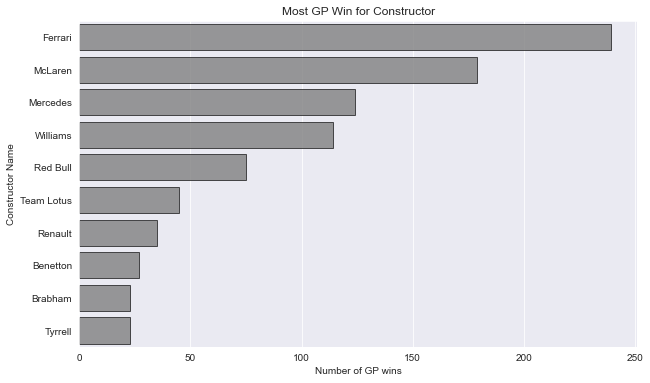

In [21]:
# Imprimindo os top 10

sb.barplot(data = top10Constructor, y='constructor_name', x='position_order',color='gray',alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('Most GP Win for Constructor')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')

Text(0.5, 0, 'Starting Position')

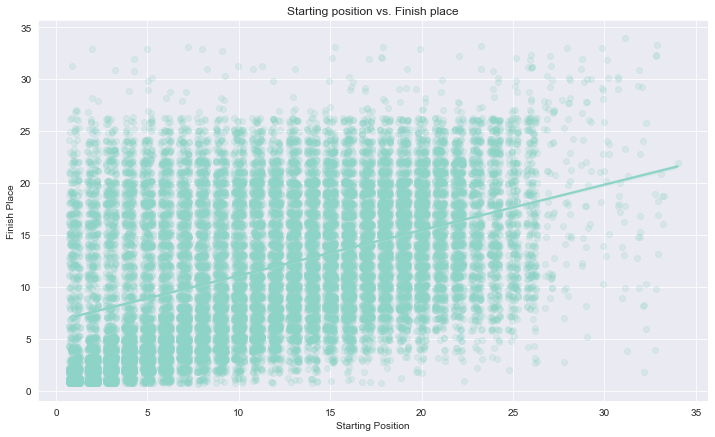

In [22]:
#Removendo valores 0 e convertendo objects para numerico
df_no_zero = df[df['grid']!=0]

# Criar impressão
plt.figure(figsize = [12, 7])
sb.regplot(data=df_no_zero, x='grid', y='position_order', x_jitter=.3, y_jitter=.3, scatter_kws= {'alpha':1/5})
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')

Text(0.5, 0.98, 'Average speed amongst all teams during fastest lap at individual GPs')

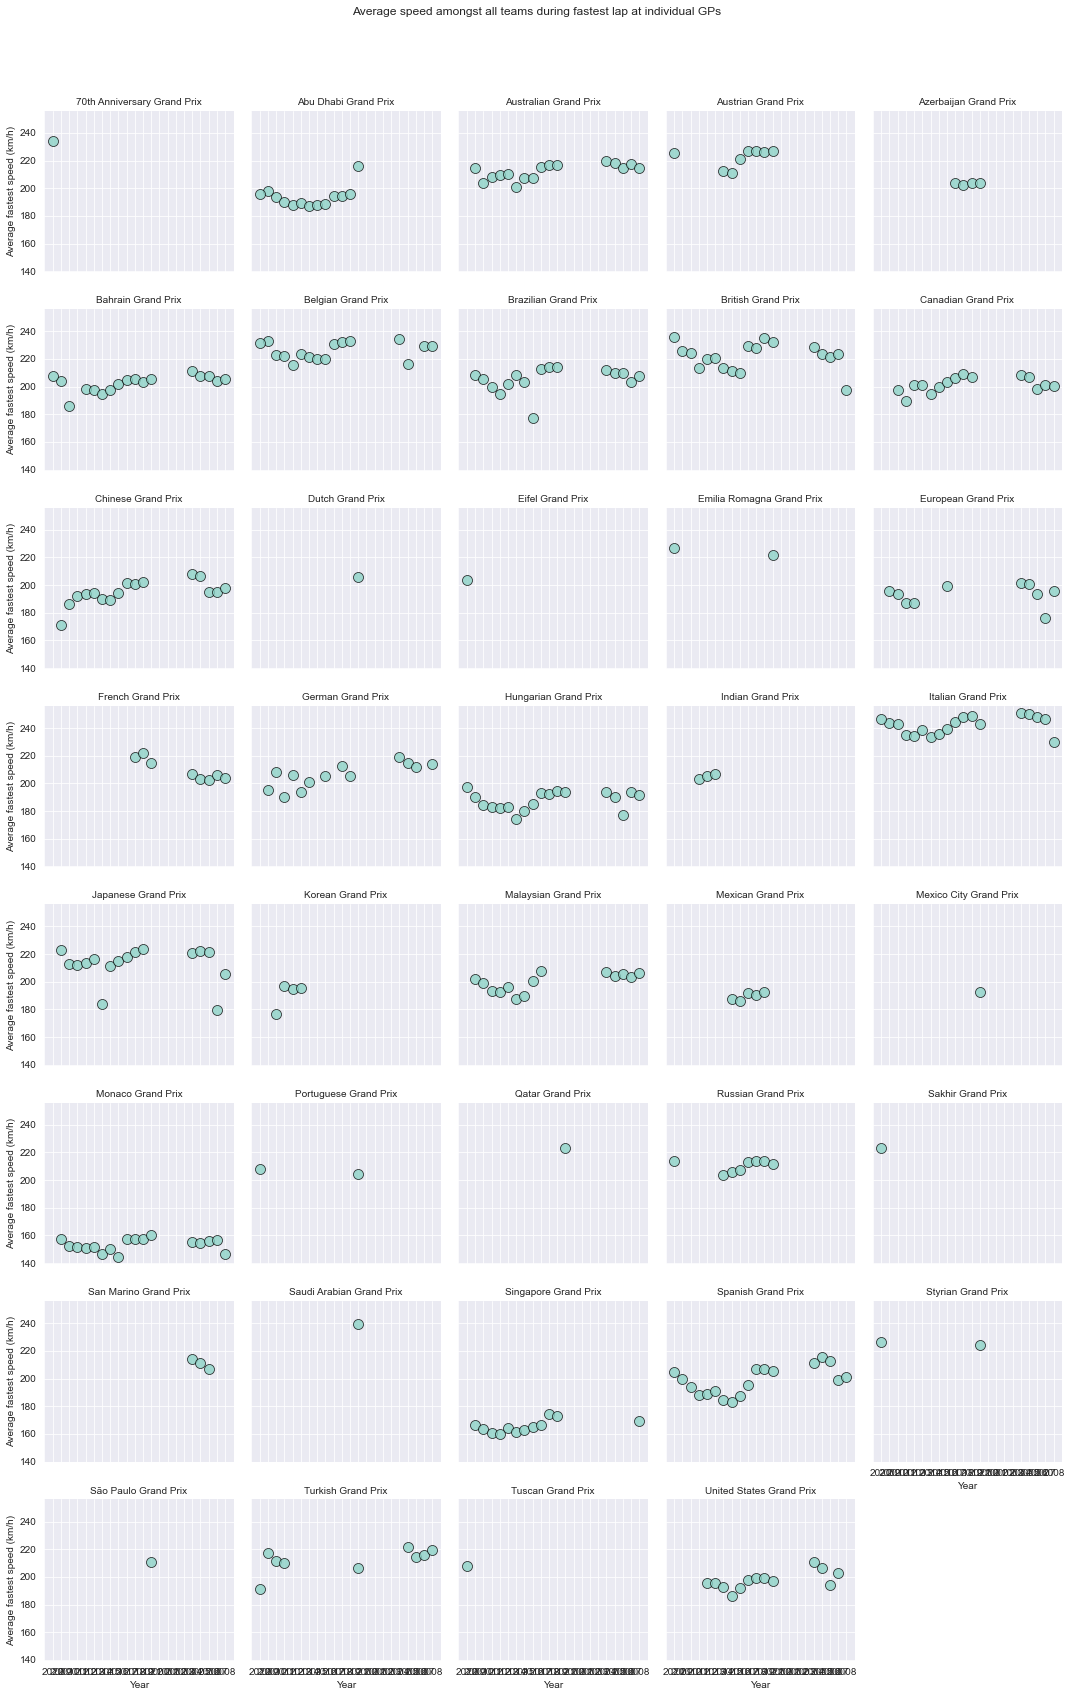

In [23]:
# Criar uma nova base para a temporada de 2000 em diante

df_speed = df[df['year'] >= '2000']
df_group_speed = df_speed.groupby(['gp_name','year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# Criar Facet-grid
g = sb.FacetGrid(data=df_group_speed, col='gp_name', col_wrap=5)
g.map(plt.scatter, 'year','fastest_lap_speed', alpha=0.8, linewidth=0.8, edgecolor='black', s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during fastest lap at individual GPs')

In [24]:
print(df_group_speed)

                         gp_name  year  fastest_lap_speed
0    70th Anniversary Grand Prix  2020         234.248250
1           Abu Dhabi Grand Prix  2009         198.041100
2           Abu Dhabi Grand Prix  2010         193.559045
3           Abu Dhabi Grand Prix  2011         189.779522
4           Abu Dhabi Grand Prix  2012         187.682739
..                           ...   ...                ...
406     United States Grand Prix  2016         191.745143
407     United States Grand Prix  2017         197.839400
408     United States Grand Prix  2018         199.424944
409     United States Grand Prix  2019         199.076600
410     United States Grand Prix  2021         197.076800

[411 rows x 3 columns]


In [25]:
#imprimindo somente resultados de Abu Dhabi

abu_dhabi_group_speed = df_group_speed[df_group_speed['gp_name']=='Abu Dhabi Grand Prix']
print(abu_dhabi_group_speed)

                 gp_name  year  fastest_lap_speed
1   Abu Dhabi Grand Prix  2009         198.041100
2   Abu Dhabi Grand Prix  2010         193.559045
3   Abu Dhabi Grand Prix  2011         189.779522
4   Abu Dhabi Grand Prix  2012         187.682739
5   Abu Dhabi Grand Prix  2013         189.595286
6   Abu Dhabi Grand Prix  2014         187.267400
7   Abu Dhabi Grand Prix  2015         187.770789
8   Abu Dhabi Grand Prix  2016         188.597273
9   Abu Dhabi Grand Prix  2017         194.579650
10  Abu Dhabi Grand Prix  2018         194.262368
11  Abu Dhabi Grand Prix  2019         195.705200
12  Abu Dhabi Grand Prix  2020         196.079000
13  Abu Dhabi Grand Prix  2021         215.871105
